In [4]:
%matplotlib inline
import sys 
sys.path.append('..')
from preamble import *

w[0]: 0.393906  b: -0.031804


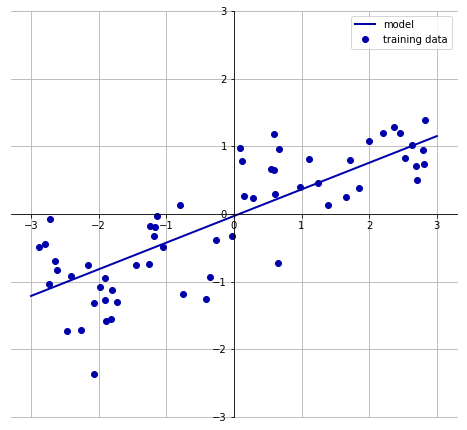

In [5]:
mglearn.plots.plot_linear_regression_wave()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [14]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.394]
lr.intercept_: -0.031804343026759746


In [15]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


In [16]:
X, y = mglearn.datasets.load_extended_boston()
print("Data shape: {}".format(X.shape))
print("Target shape: {}".format(y.shape))

Data shape: (506, 104)
Target shape: (506,)


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [18]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


##### Ridge regression
- 평균제곱오차 식에 $\alpha \sum_{j=1}^{m} w_{j}^{2}$항이 추가됨
  - 위 항을 L2 Norm 이라고 함.
- 가중치(w)에 대한 L2 규제 (L2 Regularization):
  - 모든 가중치 값들을 가능한 0에 가깝게 되도록 조정 --> 기울기를 작게 만듦 --> 즉, 각각의 특성이 출력에 주는 영향을 최소한으로 만듦
  - alpha: 규제의 강도 조정
     - alpha 값이 커지면 규제가 강화됨
     - alpha 값이 작으면 규제가 약화됨 (alpha = 0 --> 규제가 없음 --> 가중치 값의 자유도가 너무 높게됨 --> Overfitting 발생)

In [19]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


In [20]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


In [21]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


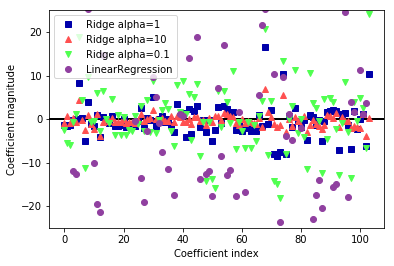

In [22]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()

##### Lasso
- 평균제곱오차식에 $\alpha \sum_{j=1}^{m} |w_{j}|$ 항이 추가됨
  - 위 항을 L1 노름이라고 함
- 라쏘와 다른점
  - 임의의 계수가 0이 되어 완전히 제거되는 특성이 생김
  - 즉, 특성 선택(Feature Selection)이 자동으로 이루어짐 

In [24]:
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [25]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.29
Test set score: 0.24
Number of features used: 1


In [27]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.67
Test set score: 0.66
Number of features used: 1


In [28]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.67
Test set score: 0.66
Number of features used: 1


Text(0,0.5,'Coefficient magnitude')

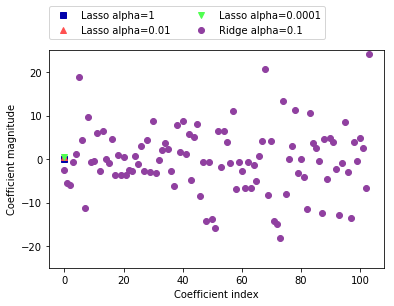

In [29]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")

plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

#### Linear models for Classification (분류를 위한 선형 모델)

- LogisticRegression & LinearSVC
  - 기본적으로 L2 규제 사용
  - 대표적인 선형 분류 모델
- with forge data

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()
print("Data shape: {}".format(X.shape))
print("Target shape: {}".format(y.shape))

Data shape: (26, 2)
Target shape: (26,)


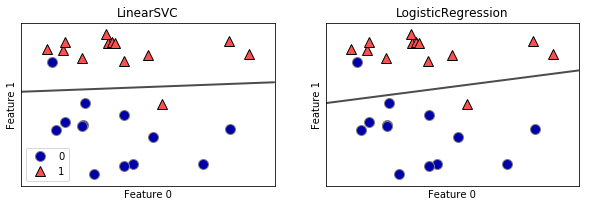

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

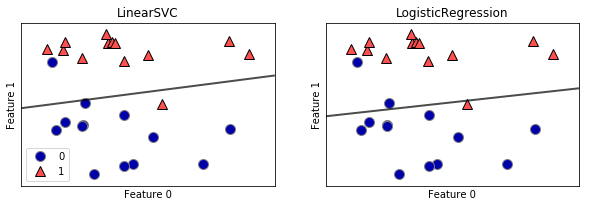

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(C=0.01), LogisticRegression(C=0.01)], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

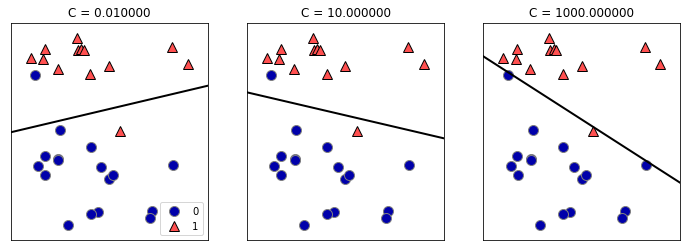

In [33]:
mglearn.plots.plot_linear_svc_regularization()

In [34]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("Shape of cancer data: {}".format(cancer.data.shape))

print()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
print("Shape of X_train: {}".format(X_train.shape))
print("Shape of X_test: {}".format(X_test.shape))

print()

logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Shape of cancer data: (569, 30)

Shape of X_train: (426, 30)
Shape of X_test: (143, 30)

Training set score: 0.955
Test set score: 0.958


In [35]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.972
Test set score: 0.965


In [36]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.934
Test set score: 0.930


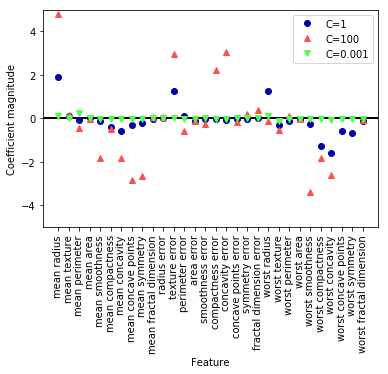

In [37]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

Training accuracy of L1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92

Training accuracy of L1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96

Training accuracy of L1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98



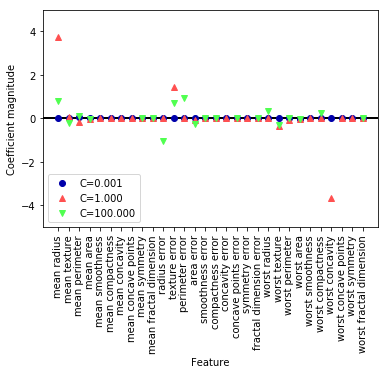

In [38]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
    print("Training accuracy of L1 logreg with C={:.3f}: {:.2f}".format(C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
    print()

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")

plt.ylim(-5, 5)
plt.legend(loc=3)

##### Linear models for multiclass classification
- 일대다 (one-vs.-rest) 방법
  - 클래스의 개수 만큼 이진 분류기 생성
  - 예측을 할 때에는 만들어진 모든 이진 분류기를 사용하여 가장 높은 점수를 내는 분류기의 클래스를 예측값으로 선택

Data shape: (100, 2)
Target shape: (100,)
2
1
0


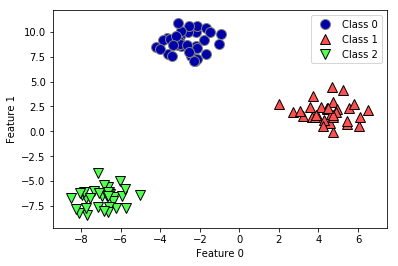

In [39]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
print("Data shape: {}".format(X.shape))
print("Target shape: {}".format(y.shape))
print(y[0])
print(y[1])
print(y[2])

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [40]:
linear_svm = LinearSVC().fit(X, y)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


- 각 세 개의 클래스 당 하나의 이진 분류기가 만들어짐
  - (3, 2) 에서 각 행은 각 클래스에 대응하는 계수 백터
  - (3,)은 각 클래스의 절편을 담은 1차원 벡터

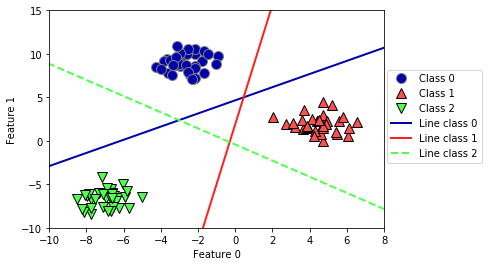

In [42]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1', 'Line class 2'], loc=(1.01, 0.3))

Text(0,0.5,'Feature 1')

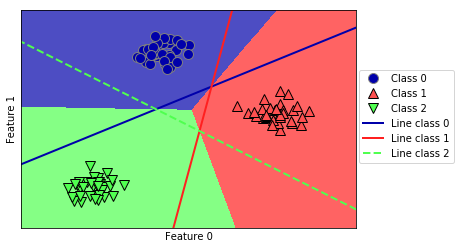

In [43]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

#### Strengths, weaknesses and parameters
- Linear Regression
  - 특성 가중치 규제 강도 조정: alpha
    - alpha가 높으면 규제를 강화함 --> 모델이 단순해짐
- LinearSVC & LogisticRegression
  - 특성 가중치 규제 강도 조정: C
    - C가 낮으면 규제를 강화함 --> 모델이 단순해짐
- 보통 alpha와 C는 로그스케일로 값을 정함
  - 0.1, 1, 10 
- L1 vs. L2
  - 중요한 특성이 많지 않아서 몇몇 특성만 골라 활용하려고 하면 L1 규제 적당
  - 모델의 해석이 중요할 때에도 L1 규제 사용
- 대용량 데이터
  - LogisticRegression 과 Ridge 에 solver='sag' 옵션 설정
    - Stochastic Average Gradient Descent: 반복이 진행될 때 이전에 구한 모든 경사의 평균을 사용하여 계수를 갱신함
  - SGDClassifier, SGDRegressor 사용

##### Method Chaining (메소드 연결)

In [44]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [46]:
logreg = LogisticRegression().fit(X_train, y_train)

In [47]:
logreg = LogisticRegression()
y_pred = logreg.fit(X_train, y_train).predict(X_test)

In [48]:
y_pred = LogisticRegression().fit(X_train, y_train).predict(X_test)